In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data in data frame
subbmission = pd.read_csv('./sample_submission_ejm25Dc.csv')
data = pd.read_excel('./Train/train_Data.xlsx')
data_dict = pd.read_excel('./Train/data_dict.xlsx')

In [7]:
#look at data
data.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,...,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,...,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,No Top-up Service
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,...,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,12-18 Months
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,...,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,> 48 Months
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,...,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,36-48 Months


In [20]:
subbmission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14745 entries, 0 to 14744
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            14745 non-null  int64 
 1   Top-up Month  14745 non-null  object
dtypes: int64(1), object(1)
memory usage: 230.5+ KB


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128655 entries, 0 to 128654
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ID               128655 non-null  int64         
 1   Frequency        128655 non-null  object        
 2   InstlmentMode    128655 non-null  object        
 3   LoanStatus       128655 non-null  object        
 4   PaymentMode      128655 non-null  object        
 5   BranchID         128655 non-null  int64         
 6   Area             117002 non-null  object        
 7   Tenure           128655 non-null  int64         
 8   AssetCost        128655 non-null  int64         
 9   AmountFinance    128655 non-null  float64       
 10  DisbursalAmount  128655 non-null  float64       
 11  EMI              128655 non-null  float64       
 12  DisbursalDate    128655 non-null  datetime64[ns]
 13  MaturityDAte     128654 non-null  datetime64[ns]
 14  AuthDate         128

In [11]:
data['Top-up Month'].unique()

array([' > 48 Months', 'No Top-up Service', '12-18 Months',
       '36-48 Months', '18-24 Months', '24-30 Months', '30-36 Months'],
      dtype=object)

In [182]:
data['Top-up Month'].nunique()

7

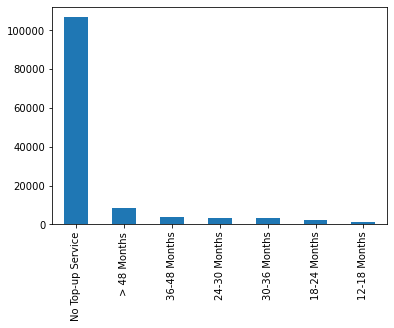

In [33]:
data['Top-up Month'].value_counts().plot(kind='bar')

In [126]:
data.nunique()

ID                 128655
Frequency               4
InstlmentMode           2
LoanStatus              2
PaymentMode            11
BranchID              189
Area                   92
Tenure                141
AssetCost            7835
AmountFinance       20439
DisbursalAmount     19412
EMI                 24323
DisbursalDate        2837
MaturityDAte          980
AuthDate             2711
AssetID            128655
ManufacturerID         10
SupplierID           4539
LTV                  7988
SEX                     2
AGE                    73
MonthlyIncome       11568
City                  488
State                  22
ZiPCODE              6903
Top-up Month            7
dtype: int64

In [21]:
data.nunique()<15

ID                 False
Frequency           True
InstlmentMode       True
LoanStatus          True
PaymentMode         True
BranchID           False
Area               False
Tenure             False
AssetCost          False
AmountFinance      False
DisbursalAmount    False
EMI                False
DisbursalDate      False
MaturityDAte       False
AuthDate           False
AssetID            False
ManufacturerID      True
SupplierID         False
LTV                False
SEX                 True
AGE                False
MonthlyIncome      False
City               False
State              False
ZiPCODE            False
Top-up Month        True
dtype: bool

In [14]:
data.isnull().sum()

ID                     0
Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               11653
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
AssetID                0
ManufacturerID         0
SupplierID             0
LTV                    0
SEX                   59
AGE                   59
MonthlyIncome        234
City               11256
State                  0
ZiPCODE              372
Top-up Month           0
dtype: int64

In [ ]:
data.n

In [17]:
demographic.columns

Index(['ID', 'SELF-INDICATOR', 'MATCH-TYPE', 'ACCT-TYPE', 'CONTRIBUTOR-TYPE',
       'DATE-REPORTED', 'OWNERSHIP-IND', 'ACCOUNT-STATUS', 'DISBURSED-DT',
       'CLOSE-DT', 'LAST-PAYMENT-DATE', 'CREDIT-LIMIT/SANC AMT',
       'DISBURSED-AMT/HIGH CREDIT', 'INSTALLMENT-AMT', 'CURRENT-BAL',
       'INSTALLMENT-FREQUENCY', 'OVERDUE-AMT', 'WRITE-OFF-AMT', 'ASSET_CLASS',
       'REPORTED DATE - HIST', 'DPD - HIST', 'CUR BAL - HIST',
       'AMT OVERDUE - HIST', 'AMT PAID - HIST', 'TENURE'],
      dtype='object')

In [114]:
#filling zip code with ranking as its categorical data , ranking is decided on basis of total disburst ammount of each zip code.

zip_ranking =data.groupby('ZiPCODE')['DisbursalAmount'].sum().reset_index()

zip_ranking['Ranking'] = zip_ranking['DisbursalAmount'].rank(ascending=False)

ranking_for_zipcode = zip_ranking.set_index('ZiPCODE').to_dict()['Ranking']

data['ZiPCODE'] = data['ZiPCODE'].map(ranking_for_zipcode)

In [125]:
data['ZiPCODE'].isnull().sum()

372

In [127]:
data.columns

Index(['ID', 'Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode',
       'BranchID', 'Area', 'Tenure', 'AssetCost', 'AmountFinance',
       'DisbursalAmount', 'EMI', 'DisbursalDate', 'MaturityDAte', 'AuthDate',
       'AssetID', 'ManufacturerID', 'SupplierID', 'LTV', 'SEX', 'AGE',
       'MonthlyIncome', 'City', 'State', 'ZiPCODE', 'Top-up Month'],
      dtype='object')

In [130]:
X = data[['Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode',
       'BranchID',  'Tenure', 'AssetCost', 'AmountFinance',
       'DisbursalAmount', 'EMI', 'DisbursalDate', 'MaturityDAte', 'AuthDate',
       'AssetID', 'ManufacturerID', 'SupplierID', 'LTV', 'SEX', 'AGE',
       'MonthlyIncome', 'ZiPCODE', 'Top-up Month']]

In [133]:
X.dtypes

Frequency                  object
InstlmentMode              object
LoanStatus                 object
PaymentMode                object
BranchID                    int64
Tenure                      int64
AssetCost                   int64
AmountFinance             float64
DisbursalAmount           float64
EMI                       float64
DisbursalDate      datetime64[ns]
MaturityDAte       datetime64[ns]
AuthDate           datetime64[ns]
AssetID                     int64
ManufacturerID              int64
SupplierID                  int64
LTV                       float64
SEX                        object
AGE                       float64
MonthlyIncome             float64
ZiPCODE                   float64
Top-up Month               object
dtype: object

In [134]:
X = pd.get_dummies(data=X,columns=['Frequency','InstlmentMode','LoanStatus','PaymentMode','SEX'])

In [138]:
X['DisbursalDate_day']=X['DisbursalDate'].dt.day
X['DisbursalDate_month']=X['DisbursalDate'].dt.month
X['DisbursalDate_year']=X['DisbursalDate'].dt.year


X['MaturityDAte_day']=X['MaturityDAte'].dt.day
X['MaturityDAte_month']=X['MaturityDAte'].dt.month
X['MaturityDAte_year']=X['MaturityDAte'].dt.year

X['AuthDate_day']=X['AuthDate'].dt.day
X['AuthDate_month']=X['AuthDate'].dt.month
X['AuthDate_year']=X['AuthDate'].dt.year

In [141]:
X

,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,...,DisbursalDate_daya,DisbursalDate_day,DisbursalDate_month,DisbursalDate_year,MaturityDAte_day,MaturityDAte_month,MaturityDAte_year,AuthDate_day,AuthDate_month,AuthDate_year
0,1,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,...,10,10,2,2012,15.0,1.0,2016.0,10,2,2012
1,333,47,485000,350000.0,350000.0,10500.0,2012-03-31,2016-02-15,2012-03-31,4681175,...,31,31,3,2012,15.0,2.0,2016.0,31,3,2012
2,1,68,690000,519728.0,519728.0,38300.0,2017-06-17,2023-02-10,2017-06-17,25328146,...,17,17,6,2017,10.0,2.0,2023.0,17,6,2017
3,125,48,480000,400000.0,400000.0,11600.0,2013-11-29,2017-11-10,2013-11-29,13021591,...,29,29,11,2013,10.0,11.0,2017.0,29,11,2013
4,152,44,619265,440000.0,440000.0,15000.0,2011-12-08,2015-07-05,2011-12-08,3291320,...,8,8,12,2011,5.0,7.0,2015.0,8,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128650,424,24,470000,265601.0,265601.0,76800.0,2018-09-21,2020-06-05,2018-09-22,31286914,...,21,21,9,2018,5.0,6.0,2020.0,22,9,2018
128651,424,24,460000,275630.0,275630.0,80100.0,2018-09-22,2020-06-05,2018-09-22,31295422,...,22,22,9,2018,5.0,6.0,2020.0,22,9,2018
128652,424,23,545000,300733.0,300733.0,15277.0,2018-11-23,2020-11-05,2018-11-23,32145629,...,23,23,11,2018,5.0,11.0,2020.0,23,11,2018
128653,424,35,350000,250962.0,250962.0,74341.0,2018-12-20,2021-06-05,2018-12-20,32509866,...,20,20,12,2018,5.0,6.0,2021.0,20,12,2018


In [146]:
X.dtypes

BranchID                             int64
Tenure                               int64
AssetCost                            int64
AmountFinance                      float64
DisbursalAmount                    float64
EMI                                float64
DisbursalDate               datetime64[ns]
MaturityDAte                datetime64[ns]
AuthDate                    datetime64[ns]
AssetID                              int64
ManufacturerID                       int64
SupplierID                           int64
LTV                                float64
AGE                                float64
MonthlyIncome                      float64
ZiPCODE                            float64
Top-up Month                        object
Frequency_BI-Monthly                 uint8
Frequency_Half Yearly                uint8
Frequency_Monthly                    uint8
Frequency_Quatrly                    uint8
InstlmentMode_Advance                uint8
InstlmentMode_Arrear                 uint8
LoanStatus_

In [147]:
X.drop(['DisbursalDate','MaturityDAte','AuthDate'],1,inplace=True)

In [172]:
y=X['Top-up Month']
X.drop('Top-up Month',1,inplace=True)

In [173]:

X.dropna(inplace=True)

In [174]:
from sklearn.model_selection import train_test_split

In [185]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=50)

In [186]:
knn_clf=KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [187]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[     0      0      0      0      0      0   8321]
 [     0      0      0      0      0      0   1034]
 [     0      0      0      0      0      0   2365]
 [     0      0      0      0      0      0   3490]
 [     0      0      0      0      0      0   3059]
 [     0      0      0      0      0      0   3645]
 [     0      0      0      0      0      0 106079]]


C:\Users\rushi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                   precision    recall  f1-score   support

      > 48 Months       0.00      0.00      0.00      8321
     12-18 Months       0.00      0.00      0.00      1034
     18-24 Months       0.00      0.00      0.00      2365
     24-30 Months       0.00      0.00      0.00      3490
     30-36 Months       0.00      0.00      0.00      3059
     36-48 Months       0.00      0.00      0.00      3645
No Top-up Service       0.83      1.00      0.91    106079

         accuracy                           0.83    127993
        macro avg       0.12      0.14      0.13    127993
     weighted avg       0.69      0.83      0.75    127993

Accuracy: 0.8287875118170525
